## All Techniques To Handle Missing Values Day - 3

## Arbitrary Value Imputation

It consist of replacing the NAN value by a arbitary value. 

This technique was derived from kaggle competition.

In [1]:
import pandas as pd 
import numpy as np 

In [2]:
import pandas as pd
df = pd.read_csv('Datasets/titanic.csv',usecols=['Age','Fare','Survived'])
df.head()

,Survived,Age,Fare
0,0,22.0,7.2500
1,1,38.0,71.2833
2,1,26.0,7.9250
3,1,35.0,53.1000
4,0,35.0,8.0500


In [3]:
def impute_nan(df,variable):
    df[variable+'_zero'] = df[variable].fillna(0)
    df[variable+'_hundred'] = df[variable].fillna(100)

<Axes: >

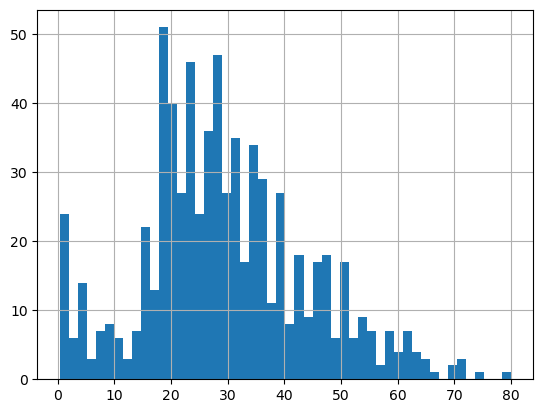

In [4]:
df.Age.hist(bins=50)

Arbitrary value should not be more frequently present. It may be least or the last outlier value.

In [5]:
impute_nan(df,'Age')

In [6]:
df.head()

,Survived,Age,Fare,Age_zero,Age_hundred
0,0,22.0,7.2500,22.0,22.0
1,1,38.0,71.2833,38.0,38.0
2,1,26.0,7.9250,26.0,26.0
3,1,35.0,53.1000,35.0,35.0
4,0,35.0,8.0500,35.0,35.0


In [7]:
import matplotlib.pyplot as plt 
import seaborn as sns

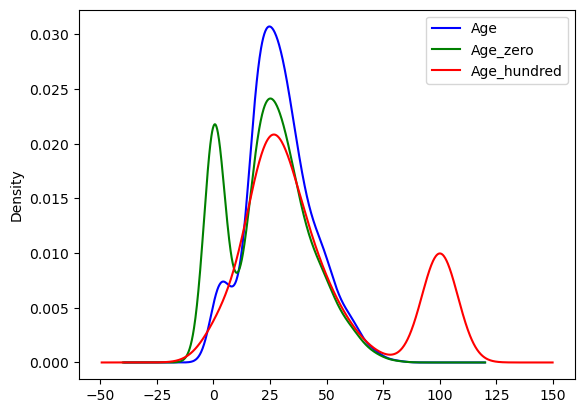

In [8]:
plt.subplot(1,1,1)

df.Age.plot(kind='kde',color='blue') ## Age feature
df.Age_zero.plot(kind='kde',color='green') ## Age_zero feature
df.Age_hundred.plot(kind='kde',color='red') ## Age_hundred feature


_,labels = plt.subplot(1,1,1).get_legend_handles_labels()
plt.legend(labels)
plt.show()

#### Advantages
1. Easy to implement
2. Captures the importance of missingess if there is one

#### Disadvantages

1. Distorts the original distribution of the variable
2. If missingess is not important, it may mask the predictive power of the original variable by distorting its distribution
3. Hard to decide which value to use

## *How to handle Categorical Missing Values*

## Frequent Category Imputation

In [9]:
import pandas as pd 
import numpy as np 

In [10]:
df = pd.read_csv('Datasets/house_prices_advanced.csv', usecols=['BsmtQual','FireplaceQu','GarageType','SalePrice'])

In [11]:
df.head()

,BsmtQual,FireplaceQu,GarageType,SalePrice
0,Gd,NaN,Attchd,208500
1,Gd,TA,Attchd,181500
2,Gd,TA,Attchd,223500
3,TA,Gd,Detchd,140000
4,Gd,TA,Attchd,250000


In [12]:
df.shape

(1460, 4)

In [13]:
## % of missing values
df.isnull().mean()

BsmtQual       0.025342
FireplaceQu    0.472603
GarageType     0.055479
SalePrice      0.000000
dtype: float64

In [14]:
df.isnull().mean().sort_values(ascending=True)

SalePrice      0.000000
BsmtQual       0.025342
GarageType     0.055479
FireplaceQu    0.472603
dtype: float64

In [15]:
df.isnull().sum()

BsmtQual        37
FireplaceQu    690
GarageType      81
SalePrice        0
dtype: int64

#### Compute the frequency with every feature

In [16]:
df.groupby(['BsmtQual'])['BsmtQual'].count()

BsmtQual
Ex    121
Fa     35
Gd    618
TA    649
Name: BsmtQual, dtype: int64

<Axes: xlabel='BsmtQual'>

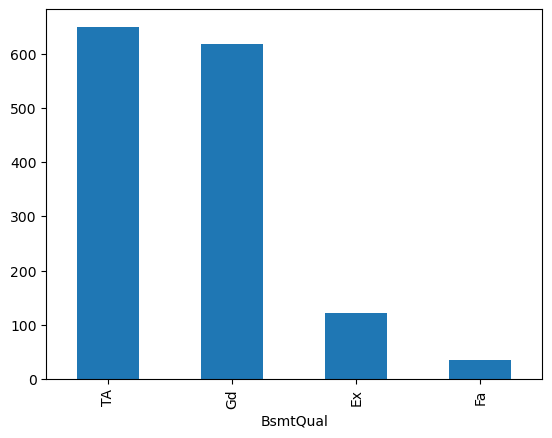

In [17]:
df.groupby(['BsmtQual'])['BsmtQual'].count().sort_values(ascending=False).plot(kind='bar')

<Axes: xlabel='FireplaceQu'>

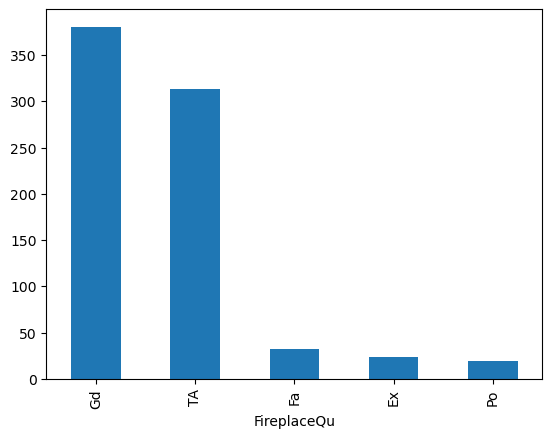

In [18]:
df['FireplaceQu'].value_counts().sort_values(ascending=False).plot(kind='bar')

In [19]:
#### replacing function
def impute_nan(df,variable):
    most_freq_category = df[variable].value_counts().index[0] ## Most frequent category in the variable
    df[variable].fillna(most_freq_category,inplace=True)
    
    
## This can also be written as
#### replacing function -->

# def impute_nan(df,variable):
#     most_freq_category = df[variable].mode()[0] ## Most frequent category in the variable
#     df[variable].fillna(most_freq_category,inplace=True)    

In [20]:
df.columns

Index(['BsmtQual', 'FireplaceQu', 'GarageType', 'SalePrice'], dtype='object')

In [21]:
for feature in df.drop(columns=['SalePrice']).columns:
    impute_nan(df,feature)

C:\Users\Yash\AppData\Local\Temp\ipykernel_7056\1425036738.py:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[variable].fillna(most_freq_category,inplace=True)
C:\Users\Yash\AppData\Local\Temp\ipykernel_7056\1425036738.py:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For exa

In [22]:
df.isnull().sum()

BsmtQual       0
FireplaceQu    0
GarageType     0
SalePrice      0
dtype: int64

In [23]:
## We can also replace with mode (which is most frequent value)

### Advantages and Disadvantages

#### Advantages
1. Easy to implement
2. Faster way to implement 

#### Disadvantages
1. Since we are using more frequent labels, it may use them in an over represented way, if there are many NANs.
2. It distorts the relation of the most frequent label

## Adding a varaible to capture NaN

In [24]:
df = pd.read_csv('Datasets/house_prices_advanced.csv', usecols=['BsmtQual','FireplaceQu','GarageType','SalePrice'])
df.head()

,BsmtQual,FireplaceQu,GarageType,SalePrice
0,Gd,NaN,Attchd,208500
1,Gd,TA,Attchd,181500
2,Gd,TA,Attchd,223500
3,TA,Gd,Detchd,140000
4,Gd,TA,Attchd,250000


In [25]:
import numpy as np 
df['BsmtQual_Var'] = np.where(df['BsmtQual'].isnull(),1,0)

In [26]:
df.head()

,BsmtQual,FireplaceQu,GarageType,SalePrice,BsmtQual_Var
0,Gd,NaN,Attchd,208500,0
1,Gd,TA,Attchd,181500,0
2,Gd,TA,Attchd,223500,0
3,TA,Gd,Detchd,140000,0
4,Gd,TA,Attchd,250000,0


In [27]:
most_freq = df['BsmtQual'].mode()[0]

In [28]:
most_freq

'TA'

In [29]:
df['BsmtQual'].fillna(most_freq,inplace=True)

C:\Users\Yash\AppData\Local\Temp\ipykernel_7056\1445780111.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['BsmtQual'].fillna(most_freq,inplace=True)


In [30]:
df.isnull().sum()

BsmtQual          0
FireplaceQu     690
GarageType       81
SalePrice         0
BsmtQual_Var      0
dtype: int64

In [31]:
df.head()

,BsmtQual,FireplaceQu,GarageType,SalePrice,BsmtQual_Var
0,Gd,NaN,Attchd,208500,0
1,Gd,TA,Attchd,181500,0
2,Gd,TA,Attchd,223500,0
3,TA,Gd,Detchd,140000,0
4,Gd,TA,Attchd,250000,0


In [32]:
## FireplaceQu

In [33]:
df['FireplaceQu_Var'] = np.where(df['FireplaceQu'].isnull(),1,0)

In [36]:
df['FireplaceQu'].value_counts()

FireplaceQu
Gd    380
TA    313
Fa     33
Ex     24
Po     20
Name: count, dtype: int64

In [41]:
frequent = df['FireplaceQu'].mode()[0]

In [42]:
frequent

'Gd'

In [43]:
df['FireplaceQu'].fillna(frequent,inplace=True)

In [44]:
df.head()

,BsmtQual,FireplaceQu,GarageType,SalePrice,BsmtQual_Var,FireplaceQu_Var
0,Gd,Gd,Attchd,208500,0,1
1,Gd,TA,Attchd,181500,0,0
2,Gd,TA,Attchd,223500,0,0
3,TA,Gd,Detchd,140000,0,0
4,Gd,TA,Attchd,250000,0,0


In [45]:
df.isnull().sum()

BsmtQual            0
FireplaceQu         0
GarageType         81
SalePrice           0
BsmtQual_Var        0
FireplaceQu_Var     0
dtype: int64

#### Suppose if you have more frequent categories, we just replace NAN with a new category

In [47]:
df = pd.read_csv('Datasets/house_prices_advanced.csv', usecols=['BsmtQual','FireplaceQu','GarageType','SalePrice'])
df.head()

,BsmtQual,FireplaceQu,GarageType,SalePrice
0,Gd,NaN,Attchd,208500
1,Gd,TA,Attchd,181500
2,Gd,TA,Attchd,223500
3,TA,Gd,Detchd,140000
4,Gd,TA,Attchd,250000


In [48]:
def impute_nan(df,variable):
    df[variable+'_new'] = np.where(df[variable].isnull(),"Missing",df[variable])

In [49]:
for feature in df.drop(columns=['SalePrice']).columns:
    impute_nan(df,feature)

In [50]:
df.isnull().sum()

BsmtQual            37
FireplaceQu        690
GarageType          81
SalePrice            0
BsmtQual_new         0
FireplaceQu_new      0
GarageType_new       0
dtype: int64

In [51]:
df.head(10)

,BsmtQual,FireplaceQu,GarageType,SalePrice,BsmtQual_new,FireplaceQu_new,GarageType_new
0,Gd,NaN,Attchd,208500,Gd,Missing,Attchd
1,Gd,TA,Attchd,181500,Gd,TA,Attchd
2,Gd,TA,Attchd,223500,Gd,TA,Attchd
3,TA,Gd,Detchd,140000,TA,Gd,Detchd
4,Gd,TA,Attchd,250000,Gd,TA,Attchd
5,Gd,NaN,Attchd,143000,Gd,Missing,Attchd
6,Ex,Gd,Attchd,307000,Ex,Gd,Attchd
7,Gd,TA,Attchd,200000,Gd,TA,Attchd
8,TA,TA,Detchd,129900,TA,TA,Detchd
9,TA,TA,Attchd,118000,TA,TA,Attchd


In [52]:
df.drop(columns=['BsmtQual','FireplaceQu','GarageType'],inplace=True)

In [53]:
df.head()

,SalePrice,BsmtQual_new,FireplaceQu_new,GarageType_new
0,208500,Gd,Missing,Attchd
1,181500,Gd,TA,Attchd
2,223500,Gd,TA,Attchd
3,140000,TA,Gd,Detchd
4,250000,Gd,TA,Attchd


In [ ]:
## There are two techniques to replace nan in this techniqu
# - Either replace with 1 or replace with "Missing"